In [1]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
import numpy as np
import ipywidgets as widgets
from IPython.display import display

In [2]:
def f(x, a):
    return a*np.sin(np.pi *x) 

In [3]:
%%html 
<style> 
.widget-readout{ color:white; font-size:20px } 
</style>

interactive(children=(IntSlider(value=200, description='iterações', layout=Layout(width='500px'), max=500, min…

findfont: Font family ['Letters for Learners'] not found. Falling back to DejaVu Sans.


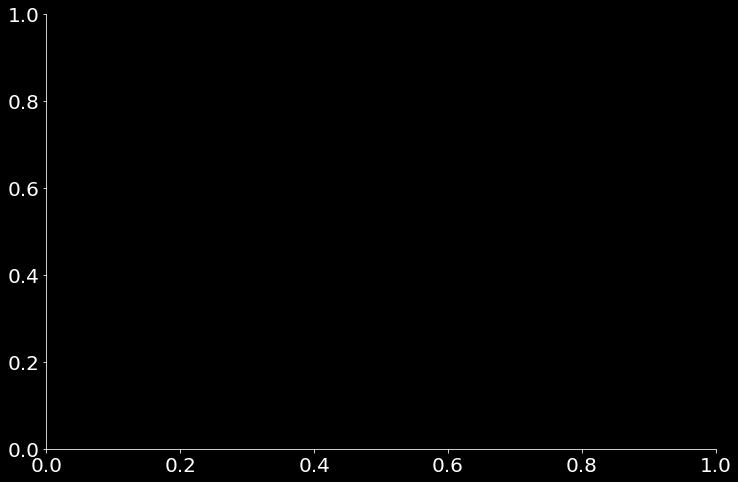

In [4]:
plt.style.use('dark_background')
plt.rcParams['font.family'] = ['Letters for Learners']
plt.rc('font', size=20) 

def bifurcationupdate(iter=1000, ai=2.8, af=4.0, roda = True):
    if roda:
        plt.close();
        fig, ax = plt.subplots(1, figsize=(12,8), facecolor='#000000')
        ax.spines['bottom'].set_color('white')
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_color('none') 
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_color('white')
    #     ax.set_ylim(bottom=-2, top=0.75)
        da = (af-ai)/1000
        x = np.arange(ai,af,da)
        y = [] 
        for a in x:
            delta = 1e-4
            b = np.random.random_sample()
            b1 = b + delta
            soma = 0 
            deltaa = abs(f(b, a) - f(b1, a))
            for t in range(iter):
                b = f(b, a)
                if (b != 0.5) :
                    soma = soma + np.log(abs(a*np.pi*np.cos(np.pi*b)))
    #             print(a,np.log(delta/deltaa))
            y.append(soma/t)
        ynp = np.array(y)
        plt.plot(x,ynp,'r,-');
        plt.plot(x[ynp>0.05],ynp[ynp>0.05], 'y.')
        
        
i_s  = widgets.IntSlider(min=100, max=500, step=50, value=200, layout=widgets.Layout(width='500px'), description='iterações')
# l_s  = widgets.FloatSlider(min=1, max=101, step=10, value=10,  layout=widgets.Layout(width='400px'), description = 'últimas')
ai_s = widgets.FloatSlider(min=1/np.pi, max=1, step=0.01, value=2, layout=widgets.Layout(width='500px'), description = 'a inicial')
af_s = widgets.FloatSlider(min=1/np.pi, max=1, step=0.01, value=4, layout=widgets.Layout(width='500px'), description = 'a final')
r_s =  widgets.Checkbox(
    value=True,
    description='Atualiza',
    disabled=False,
    indent=False, 
)
widgets.interact(bifurcationupdate, iter=i_s, ai=ai_s, af=af_s, roda=r_s);